# Basic Pre-processing

In [1]:
import pandas as pd
import numpy as np

file_path = "C:/Users/凡/Desktop/project/durham_mds/data/PDNTBA pKa scans.xlsx"
sheet_name = "pdntba20mmscan2"

data = pd.read_excel(file_path,sheet_name,engine = "openpyxl")



def edit_df(df, i, j):
    """
    function to drop empty cells and separate the type of additive compound and its volume.
    df: pd.DataFrame
        headers include information about the amount of HCl,
        the first row has wavelength and absorbance like header row,
        other cells have numerical values,
        there are some unnecessary & missing values as well.
    i: int, start column
    j: int, end column
    """
    # Remove null values of each HCl column.
    temp = df.iloc[1:, i:j].dropna()
    
    # Take the information about the additive & the amount of it from the header.
    cols = temp.columns
    add = (cols[0]).split(' ')
    if add[-1] != "hcl":
        additive = 'hcl'
        vol = 0
    else:
        additive = add[-1]
        vol = eval(add[0])
    temp = temp.rename(columns = {cols[0] : "wavelength",
                                 cols[1] : "absorbance"})
    temp['additive'] = additive
    temp['volume(mm)'] = vol
    return temp


def data_transformer(df):
    """
    function to transform the shape of dataframe.
    df: pd.DataFrame
    """
    # Remove unnecessary cells by detercting an empty row.
    df = df.dropna(axis = 1,
                  how = "all")
    idx = df.index[data.isnull().all(axis=1)].tolist()
    if len(idx) > 0:
        df = df.iloc[:idx[0], :]
    
    # Create the transformed data frame.
    transformed_df = pd.DataFrame()
    iter = int(len(df.columns) // 2)
    for i in range(iter):
        temp = edit_df(df, (2 * i), (2 * i + 2))
        transformed_df = pd.concat([transformed_df, temp])

    return transformed_df.reset_index(drop = True)


    
# Run the code below after uncommenting them.
df = data_transformer(data)
    
# If you want to pivot the table,
pivot_df = pd.pivot_table(df,
                           columns="wavelength",
                           index="volume(mm)",
                           values="absorbance")
print(pivot_df)

wavelength 199.954468 200.045593 200.112137 200.202728 200.269272 200.359863  \
volume(mm)                                                                     
0              9.9999        NaN     9.9999        NaN   4.196593        NaN   
10           3.816659        NaN   4.421644        NaN   3.998137        NaN   
15           3.341375        NaN   3.458164        NaN   3.413313        NaN   
20           3.480872        NaN   3.554327        NaN   3.431388        NaN   
25           3.682085        NaN   3.814281        NaN   3.671097        NaN   
30           3.573227        NaN   3.614384        NaN   3.664709        NaN   
40           3.627362        NaN   3.473888        NaN   3.545375        NaN   
50             9.9999        NaN   4.186535        NaN   4.362165        NaN   
60            3.55334        NaN        NaN        NaN        NaN        NaN   
100          3.464006        NaN   3.403469        NaN   3.520997        NaN   
500               NaN     3.7113        

In [2]:
# Convert all columns to numeric, forcing errors to NaN if conversion fails
pivot_df = pivot_df.apply(pd.to_numeric, errors='coerce')

# Now apply the interpolation
df_new = pivot_df.interpolate(method='linear', axis=1)

print(df_new)

wavelength  199.954468  200.045593  200.112137  200.202728  200.269272  \
volume(mm)                                                               
0             9.999900    9.999900    9.999900    7.098247    4.196593   
10            3.816659    4.119151    4.421644    4.209891    3.998137   
15            3.341375    3.399770    3.458164    3.435739    3.413313   
20            3.480872    3.517599    3.554327    3.492857    3.431388   
25            3.682085    3.748183    3.814281    3.742689    3.671097   
30            3.573227    3.593805    3.614384    3.639546    3.664709   
40            3.627362    3.550625    3.473888    3.509632    3.545375   
50            9.999900    7.093218    4.186535    4.274350    4.362165   
60            3.553340    3.534694    3.516048    3.497402    3.478756   
100           3.464006    3.433737    3.403469    3.462233    3.520997   
500                NaN    3.711300    3.584779    3.458259    3.529978   

wavelength  200.359863  200.426407  2

# Visualization

In [3]:
import matplotlib.pyplot as plt

def plot_2d(df):
    """
    function to visualize the dataframe in a two-dimensional view
    df: pd. Dataframe
    """
    # Assuming `pivot_df_interpolated` is your DataFrame
    df.T.plot(figsize=(12, 8))
    plt.xlabel('Wavelength')
    plt.ylabel('Absorbance')
    plt.title('Abosorbance vs. Wavelength')
    plt.legend(title='Volume (ml)', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()
# Run the code below after uncommenting them.
# plot_2d(df_new)

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_3d(df):
    """
    function to visualize the dataframe in a three-dimensional view
    df:pd.Dataframe
    """
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    X, Y = np.meshgrid(df.columns, df.index)
    Z = df.values

    ax.plot_surface(X, Y, Z, cmap='viridis')

    ax.set_xlabel('Wavelength')
    ax.set_ylabel('Volume (ml)')
    ax.set_zlabel('Absorbance')
    ax.set_title('3D Surface Plot of Volume vs. Wavelength')

    plt.show()
# Run the code below after uncommenting them.
# plot_3d(df_new)


# Further Pre-processing

wavelength  234.005722  234.096314  234.162415  234.252991  234.319092  \
volume(mm)                                                               
0             3.181936    3.177164    3.172393    3.158983    3.145573   
10            2.944167    3.012049    3.079931    3.060919    3.041908   
15            3.017448    3.001013    2.984577    2.928857    2.873137   
20            3.036114    3.041653    3.047192    2.999813    2.952434   
25            3.012630    3.045007    3.077383    3.040837    3.004290   
30            2.979174    2.986653    2.994131    2.934737    2.875342   
40            2.989456    2.964256    2.939055    2.949066    2.959076   
50            2.887898    2.925146    2.962393    2.898494    2.834594   
60            2.924263    2.890350    2.856436    2.822523    2.788609   
100           2.809541    2.766756    2.723970    2.698010    2.672049   
500           2.608420    2.576328    2.569937    2.563546    2.518217   

wavelength  234.475769  234.566361  2

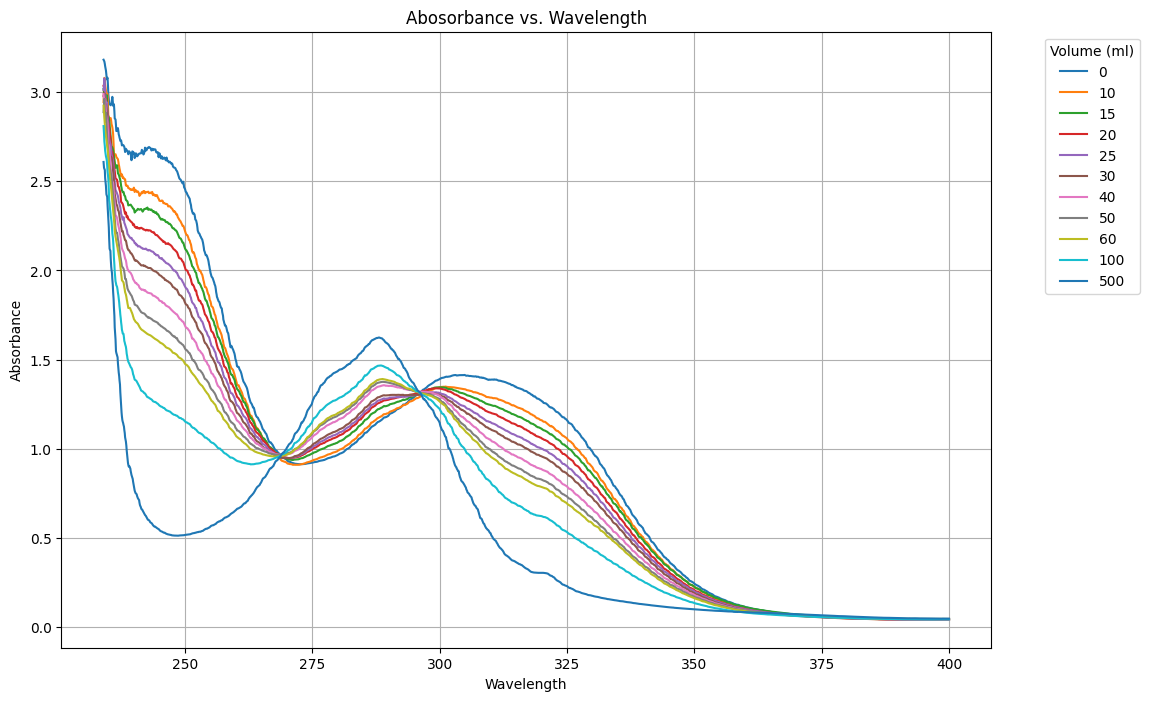

In [5]:
# Filter out the columns where the wavelength is less than 235
filtered_df = df_new.loc[:, (df_new.columns >= 234) & (df_new.columns <= 400)]

# Now `filtered_df` contains only the data where the wavelength is 235 or greater
print(filtered_df)
plot_2d(filtered_df)

wavelength  234.005722  234.096314  234.162415  234.252991  234.319092  \
volume(mm)                                                               
0             0.000000    0.000000    0.000000    0.000000    0.000000   
10           -0.237769   -0.165115   -0.092462   -0.098064   -0.103665   
15           -0.164488   -0.176152   -0.187816   -0.230126   -0.272436   
20           -0.145823   -0.135512   -0.125201   -0.159170   -0.193139   
25           -0.169306   -0.132158   -0.095010   -0.118146   -0.141283   
30           -0.202762   -0.190512   -0.178262   -0.224246   -0.270231   
40           -0.192480   -0.212909   -0.233337   -0.209917   -0.186497   
50           -0.294038   -0.252019   -0.210000   -0.260489   -0.310979   
60           -0.257673   -0.286815   -0.315957   -0.336460   -0.356964   
100          -0.372395   -0.410409   -0.448423   -0.460973   -0.473524   
500          -0.573516   -0.600836   -0.602456   -0.595437   -0.627356   

wavelength  234.475769  234.566361  2

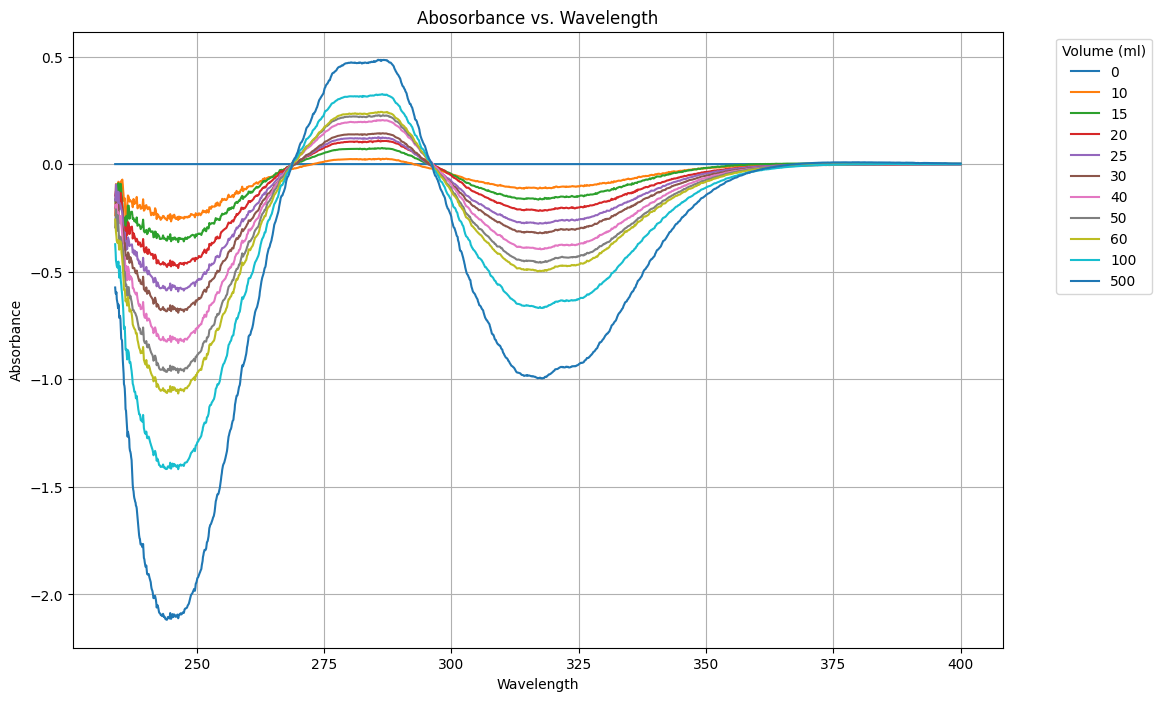

In [6]:
import pandas as pd
# Subtract the first row from all rows
spec_diff = filtered_df.subtract(filtered_df.iloc[0], axis=1)

# Print or display the processed DataFrame
print(spec_diff)
plot_2d(spec_diff)

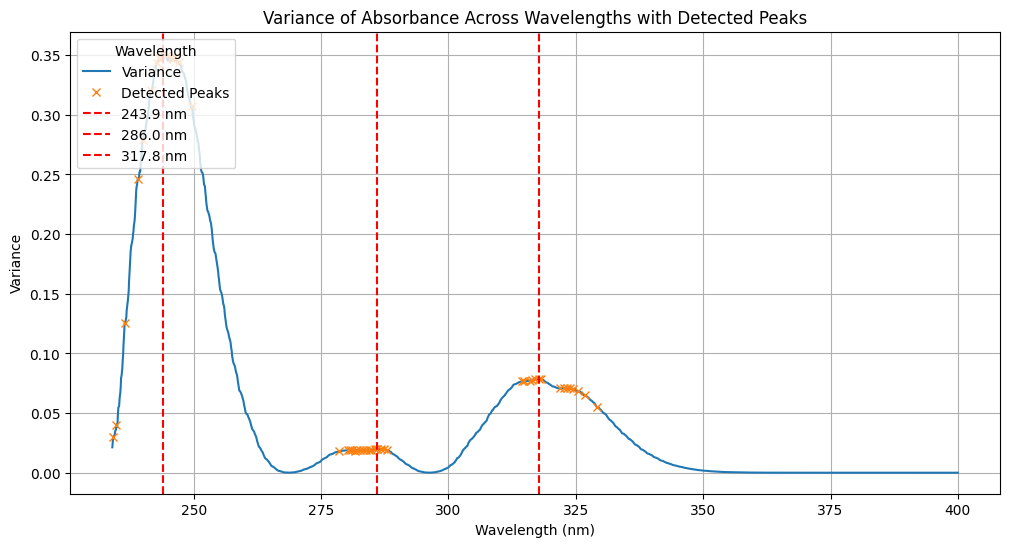

Final significant wavelengths: [243.8723602, 286.0421753, 317.8129883]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from sklearn.cluster import DBSCAN

def find_and_cluster_peaks(df, height=0.01, distance=5, eps=10, min_samples=1):
    """
    Function to find peaks in the absorbance variance, cluster them using DBSCAN, and plot the results.
    
    Parameters:
    df : pd.DataFrame
        A DataFrame where each row represents different volumes (indexed by volume),
        and each column represents different wavelengths. The DataFrame contains
        absorbance data.
    height : float, optional, default=0.02
        Minimum height of peaks to be detected in the variance.
    distance : int, optional, default=5
        Minimum distance between peaks to be detected.
    eps : float, optional, default=10
        The maximum distance between two samples for one to be considered as in the neighborhood of the other
        for DBSCAN clustering.
    min_samples : int, optional, default=1
        The number of samples in a neighborhood for a point to be considered as a core point for DBSCAN clustering.
    
    Returns:
    final_wavelengths : list
        A list of the most significant wavelengths selected from each cluster.
    """

    # Calculate variance of absorbance across wavelengths
    absorbance_variance = df.var(axis=0)

    # Find peaks in the absorbance variance
    peaks, _ = find_peaks(absorbance_variance, height=height, distance=distance)
    peak_wavelengths = df.columns[peaks]
    peak_variances = absorbance_variance.iloc[peaks]

    # Plot the variance and detected peaks
    absorbance_variance.plot(figsize=(12, 6), label='Variance')
    plt.plot(peak_wavelengths, peak_variances, "x", label='Detected Peaks')

    # Convert peak_wavelengths to a NumPy array and reshape it for DBSCAN
    peak_wavelengths_array = peak_wavelengths.to_numpy().reshape(-1, 1)
    
    # Apply DBSCAN clustering
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(peak_wavelengths_array)
    labels = clustering.labels_

    # Select the most significant peak within each cluster
    final_wavelengths = []
    for label in np.unique(labels):
        cluster_indices = np.where(labels == label)[0]
        cluster_peaks = peak_wavelengths[cluster_indices]
        cluster_variances = peak_variances.iloc[cluster_indices]
        most_significant_peak = cluster_peaks[np.argmax(cluster_variances)]
        final_wavelengths.append(most_significant_peak)

    # Highlight significant wavelengths on the plot
    for wavelength in final_wavelengths:
        plt.axvline(x=wavelength, color='red', linestyle='--', label=f'{wavelength:.1f} nm')

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Variance')
    plt.title('Variance of Absorbance Across Wavelengths with Detected Peaks')
    plt.legend(title='Wavelength', bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    plt.grid(True)
    plt.show()
    
    print("Final significant wavelengths:", final_wavelengths)
    return final_wavelengths

# Run the code below after uncommenting them.
final_wavelengths = find_and_cluster_peaks(filtered_df)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def plot_sigmoidal_fit_for_wavelengths(spec_diff, final_wavelengths):
    """
    Function to generate and plot sigmoidal fits for total absorbance differences
    across various pH levels at significant wavelengths.
    
    Parameters:
    spec_diff : pd.DataFrame
        A DataFrame where each row represents different volumes (indexed by volume),
        and each column represents different wavelengths. The DataFrame contains
        absorbance data.
    final_wavelengths : list or np.array
        A list or array of significant wavelengths for which the sigmoidal fits
        should be generated.
    
    Returns:
    None. The function generates and displays a plot for each wavelength.
    """
    
    # Define the pH mapping for the volumes
    pH_mapping = {
        '0': 2,
        '10': 1.885,
        '15': 1.707,
        '20': 1.611,
        '25': 1.506,
        '30': 1.404,
        '40': 1.264,
        '50': 1.184,
        '60': 1.105,
        '100': 0.878,
        '500': 0.3
    }
    
    # Map the volumes in spec_diff.index to corresponding pH values
    pH_values = np.array([pH_mapping[str(volume)] for volume in spec_diff.index])
    
    # Loop over each significant wavelength and generate a separate plot
    for wavelength in final_wavelengths:
        # Find the nearest wavelength in the DataFrame columns
        closest_wavelength_index = (np.abs(spec_diff.columns.astype(float) - wavelength)).argmin()
        closest_wavelength = spec_diff.columns[closest_wavelength_index]
        
        # Calculate the total absorbance difference for this wavelength
        total_abs_diff = spec_diff.iloc[:, closest_wavelength_index].abs()
        
        # Define the sigmoidal function for fitting
        def sigmoid(pH, pKa, a, b):
            return a / (1 + np.exp(-(pH - pKa) * 2)) + b
        
        # Fit the combined data using the pH values and total absorbance differences
        p0 = [6.5, max(total_abs_diff) - min(total_abs_diff), min(total_abs_diff)]  # Initial guess
        popt, _ = curve_fit(sigmoid, pH_values, total_abs_diff, p0, maxfev=10000)
        
        # Extract the pKa value from the fitted parameters
        pKa_value = popt[0]
        
        # Generate a pH range for plotting the fit
        pH_range = np.linspace(min(pH_values), max(pH_values), 500)
        fit = sigmoid(pH_range, *popt)
        
        # Plot the fit against the combined data
        plt.figure(figsize=(8, 6))
        plt.scatter(pH_values, total_abs_diff, color='black', label='Experimental Data')
        plt.plot(pH_range, fit, label=f'Fit (pKa = {pKa_value:.2f})', color='red')
        plt.xlabel('pH')
        plt.ylabel('Total Absorbance Difference')
        plt.title(f'Total Absorbance Difference vs pH at {closest_wavelength} nm')
        plt.legend(loc='upper left')
        plt.grid(True)
        plt.show()
        
        # Print the determined pKa value
        print(f'Wavelength: {closest_wavelength} nm, Determined pKa value: {pKa_value:.2f}')
# Run the code below after uncommenting them.
# plot_sigmoidal_fit_for_wavelengths(spec_diff, final_wavelengths)

In [9]:
# Modify the function to return a single fluctuation value for the selected wavelength
def quantify_total_fluctuation(df, selected_wavelength, window=3):
    """
    Quantifies the total fluctuation in absorbance values around a selected wavelength.
    
    Parameters:
    df : pd.DataFrame
        The DataFrame containing absorbance data with wavelengths as columns.
    selected_wavelength : float
        The wavelength around which fluctuation is to be quantified.
    window : int, optional, default=5
        The window size (in nm) to consider on either side of the selected wavelength.
    
    Returns:
    total_fluctuation : float
        The total fluctuation (sum of standard deviations) across all volumes.
    """
    # Select the range of wavelengths within ±window nm of the selected wavelength
    wavelength_range = df.loc[:, (df.columns >= selected_wavelength - window) & 
                                   (df.columns <= selected_wavelength + window)]
    
    # Calculate the standard deviation across the wavelength range for each volume (row)
    fluctuation_df = wavelength_range.std(axis=1)
    
    # Sum up all the fluctuation values to return a single number
    total_fluctuation = fluctuation_df.sum()
    
    return total_fluctuation

# Calculate total fluctuation for the selected wavelength (243.87 nm)
total_fluctuation_value1 = quantify_total_fluctuation(filtered_df, selected_wavelength=243.87)
total_fluctuation_value2 = quantify_total_fluctuation(filtered_df, selected_wavelength=317.81)

# Display the result
print(total_fluctuation_value1,total_fluctuation_value2)


0.37322142287727506 0.28262647446162287


In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler and PCA on filtered_df without transposing
# Rows represent volumes, and columns represent wavelengths
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_df)  # No transpose here

# Apply PCA to reduce dimensionality across volumes
pca = PCA(n_components=5)  # Reducing to the first 5 principal components
pca_result = pca.fit_transform(scaled_data)

# Store the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Convert the PCA results back into a DataFrame for further analysis
# Each row represents a volume and each column is a principal component (PC1, PC2, ...)
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=filtered_df.index)

# Display the explained variance by each component and preview the PCA-transformed data
explained_variance, pca_df.head()


(array([8.36607221e-01, 1.36440902e-01, 1.45440825e-02, 1.08928408e-02,
        6.41306317e-04]),
                   PC1        PC2        PC3       PC4       PC5
 volume(mm)                                                     
 0          -52.208251  20.235033  -6.574125  2.346731  0.634145
 10         -41.884145  -2.869097  12.031728  2.283738 -0.398289
 15         -29.236319  26.857894   0.733281 -3.451716 -0.247238
 20         -24.533369  -6.120833  -3.497058 -2.791553 -1.606483
 25         -15.071819   0.689007   2.735694  1.402530  1.251169)

In [11]:
# Select the first row of the PCA-transformed data
first_row_pca = pca_df.iloc[0]

# Subtract the first row from all rows in the PCA-transformed data
pca_spec_diff = pca_df.subtract(first_row_pca, axis=1)

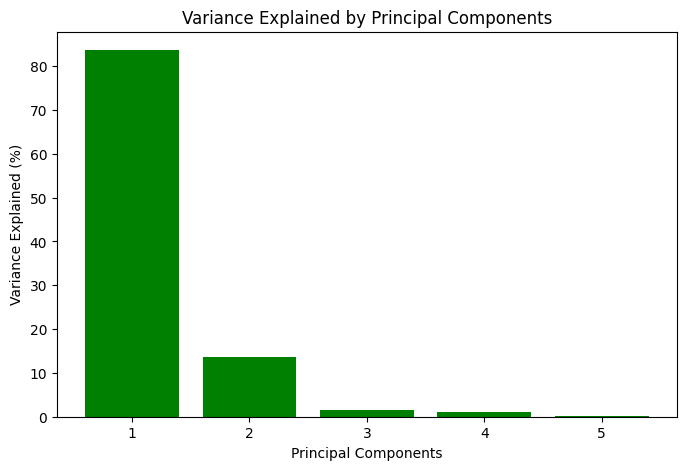

In [13]:
def plot_explained_variance(explained_variance):
    """
    Plot the explained variance of the principal components.
    """
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100, color='green')
    plt.xlabel('Principal Components')
    plt.ylabel('Variance Explained (%)')
    plt.title('Variance Explained by Principal Components')
    plt.show()

# Call the function to plot explained variance
plot_explained_variance(explained_variance)


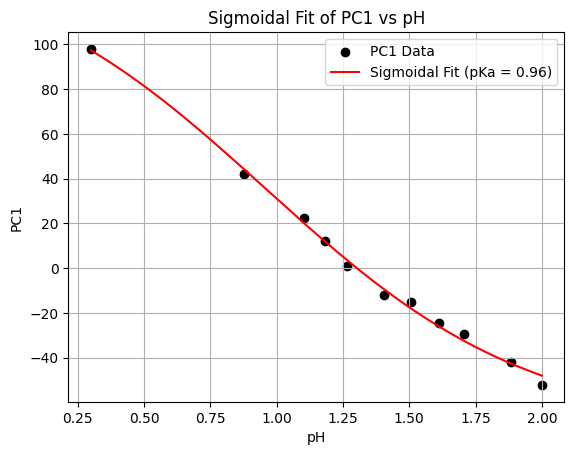

Determined pKa value: 0.96


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# pH mapping for the volumes in your dataset
pH_values_dict =  {
    '0': 2,
    '10': 1.885,
    '15': 1.707,
    '20': 1.611,
    '25': 1.506,
    '30': 1.404,
    '40': 1.264,
    '50': 1.184,
    '60': 1.105,
    '100': 0.878,
    '500': 0.3
}

# Extract the volumes from pca_df index
volumes = pca_df.index.astype(str)

# Create the corresponding pH values based on the volumes in the index
pH_values = np.array([pH_values_dict[vol] for vol in volumes if vol in pH_values_dict])

# Ensure that the length of pH_values matches the length of PC1
assert len(pH_values) == len(pca_df['PC1']), "pH_values and PC1 must have the same length."

# Sigmoid function for fitting
def sigmoid(pH, pKa, a, b):
    return a / (1 + np.exp(-(pH - pKa) * 2)) + b

# Adjust the initial guesses for the curve fitting
# For example, starting with pKa ~ 1.0, a ~ max(PC1), and b ~ min(PC1)
initial_pKa = 1.0  # Adjust based on expected pKa
initial_a = max(pca_df['PC1']) - min(pca_df['PC1'])  # Based on the range of PC1 values
initial_b = min(pca_df['PC1'])  # The lower end of the PC1 values

# Fit the sigmoid curve to PC1
popt, _ = curve_fit(sigmoid, pH_values, pca_df['PC1'], p0=[initial_pKa, initial_a, initial_b])

# Plot the fit and data
pH_range = np.linspace(min(pH_values), max(pH_values), 500)
fit = sigmoid(pH_range, *popt)

plt.scatter(pH_values, pca_df['PC1'], color='black', label='PC1 Data')
plt.plot(pH_range, fit, color='red', label=f'Sigmoidal Fit (pKa = {popt[0]:.2f})')
plt.xlabel('pH')
plt.ylabel('PC1')
plt.title('Sigmoidal Fit of PC1 vs pH')
plt.legend()
plt.grid(True)
plt.show()

# pKa value
print(f"Determined pKa value: {popt[0]:.2f}")
